In [60]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
iris = load_iris()

In [115]:
data_1 = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data_1[data_1.columns[0:2]] #Оставил два столбца по условию
data_class = iris.target
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [12]:
#разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)


In [16]:
#Обучение
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [17]:
#Прогноз
lda.predict(X_test)

array([1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0])

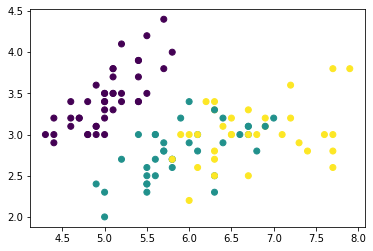

In [54]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score #Проверка через точность
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [29]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

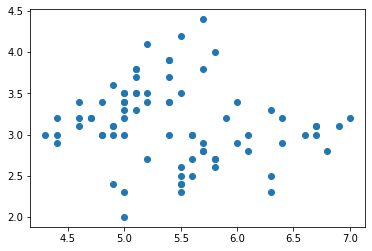

In [52]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [41]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

<ipython-input-51-92b480041e76>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='Pastel1',


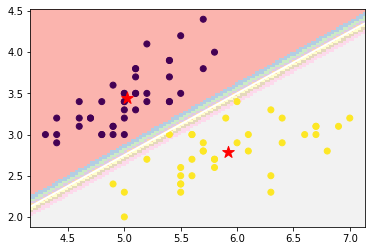

In [51]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='Pastel1',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

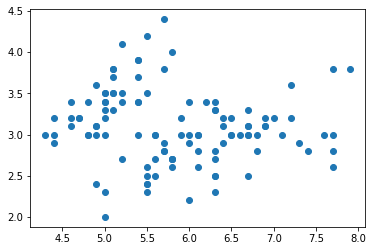

In [55]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)']) #Без целевой переменной
plt.show()

In [111]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_train)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

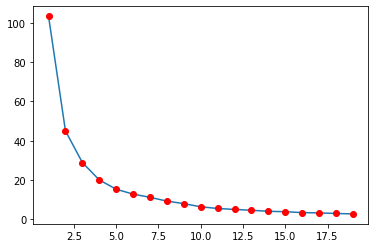

In [112]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro') #Оптимально 3 класера

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [113]:
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = KMeans(n_clusters=3).fit_predict(X_train, y_train)
clusters

array([2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0,
       2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0,
       0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2,
       0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1,
       0, 2])

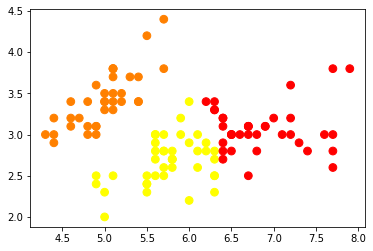

In [114]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap='autumn', c=clusters, s=60)
plt.show()